# 파일 불러오기

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("data.csv")
df
df.columns

Index(['Unnamed: 0', 'Gender', 'Shift', 'Injury Location', 'Age_grouping',
       'scaled_DaysLost', 'scaled_IncidentCost', 'Incident Type_Burn',
       'Incident Type_Crush & Pinch', 'Incident Type_Cut',
       'Incident Type_Equipment', 'Incident Type_Fall',
       'Incident Type_Falling object', 'Incident Type_Lifting',
       'Incident Type_Slip/trip', 'Incident Type_Vehicle'],
      dtype='object')

# 전처리

In [2]:
from sklearn.model_selection import train_test_split

X=df[['scaled_DaysLost', 'Shift','Gender','Incident Type_Burn',
       'Incident Type_Crush & Pinch', 'Incident Type_Cut',
       'Incident Type_Equipment', 'Incident Type_Fall',
       'Incident Type_Falling object', 'Incident Type_Lifting',
       'Incident Type_Slip/trip', 'Incident Type_Vehicle']].astype(float)
Y = df[[ 'Injury Location']].astype(float)
Y=np.ravel(Y)
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.20,random_state =1)
X

,scaled_DaysLost,Shift,Gender,Incident Type_Burn,Incident Type_Crush & Pinch,Incident Type_Cut,Incident Type_Equipment,Incident Type_Fall,Incident Type_Falling object,Incident Type_Lifting,Incident Type_Slip/trip,Incident Type_Vehicle
0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.6,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
467,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
468,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
469,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
470,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# 모델링

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
t_predicted = tree.predict(X_test)
a_predicted = tree.predict(X_train)
print('Test_Accuracy: {:.3f}'.format(accuracy_score(y_test,t_predicted)))
print('Train_Accuracy: {:.3f}'.format(accuracy_score(y_train,a_predicted)))

Test_Accuracy: 0.305
Train_Accuracy: 0.477


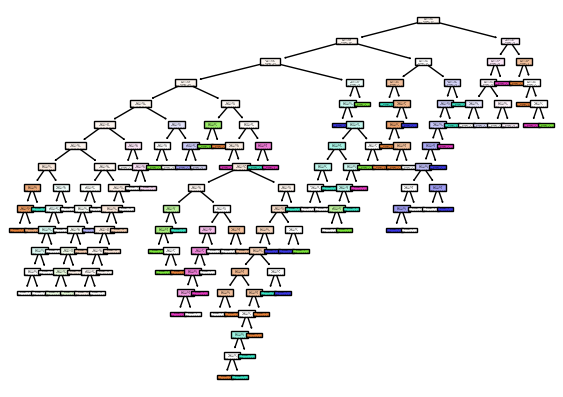

In [4]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier as DT, plot_tree

plt.figure(figsize=(7,5), dpi=100)
plot_tree(tree, filled=True)
plt.show()

# 가지치기(GridSearch)

In [6]:
from sklearn.model_selection import GridSearchCV
import random as rd

param={
    "min_samples_leaf":[2,3,4,5,6,7,8,9,10,11,12,13,14,15],
    "max_depth":[5,6,7,8,9,10],
    "min_samples_split":[2,3,4,5,6,7,8,9,10,11,12,13,14,15]
}

gs = GridSearchCV(DecisionTreeClassifier(random_state=0), param, n_jobs=-1)
gs.fit(X_train, y_train)


print(gs.best_params_)
t_predicted = gs.predict(X_test)
a_predicted = gs.predict(X_train)
dt = gs.best_estimator_
print('Test_Accuracy: {:.3f}'.format(accuracy_score(y_test,t_predicted)))
print('Train_Accuracy: {:.3f}'.format(accuracy_score(y_train,a_predicted)))
t_predicted

{'max_depth': 6, 'min_samples_leaf': 5, 'min_samples_split': 11}
Test_Accuracy: 0.305
Train_Accuracy: 0.332


array([0., 0., 3., 4., 0., 0., 0., 0., 0., 1., 4., 0., 0., 0., 3., 0., 1.,
       4., 0., 0., 0., 0., 4., 0., 3., 0., 4., 4., 0., 0., 3., 0., 4., 4.,
       4., 0., 0., 0., 0., 0., 0., 3., 0., 0., 1., 4., 0., 0., 4., 3., 0.,
       3., 4., 0., 3., 3., 3., 4., 0., 4., 0., 3., 3., 0., 0., 0., 0., 0.,
       0., 0., 4., 0., 0., 0., 4., 0., 0., 4., 0., 0., 1., 4., 4., 0., 3.,
       0., 0., 0., 4., 0., 4., 0., 0., 4., 4.])

In [7]:
y_test

array([0., 3., 0., 1., 3., 4., 0., 0., 4., 1., 2., 3., 0., 3., 3., 3., 0.,
       1., 0., 1., 1., 4., 1., 0., 3., 1., 4., 4., 2., 2., 4., 4., 1., 0.,
       2., 1., 2., 0., 0., 2., 1., 3., 3., 2., 4., 2., 0., 3., 3., 0., 3.,
       2., 1., 3., 3., 2., 3., 4., 1., 1., 0., 0., 0., 0., 0., 3., 3., 0.,
       0., 3., 2., 4., 0., 0., 0., 3., 2., 2., 0., 1., 0., 0., 3., 0., 2.,
       3., 0., 4., 1., 0., 3., 2., 4., 1., 2.])

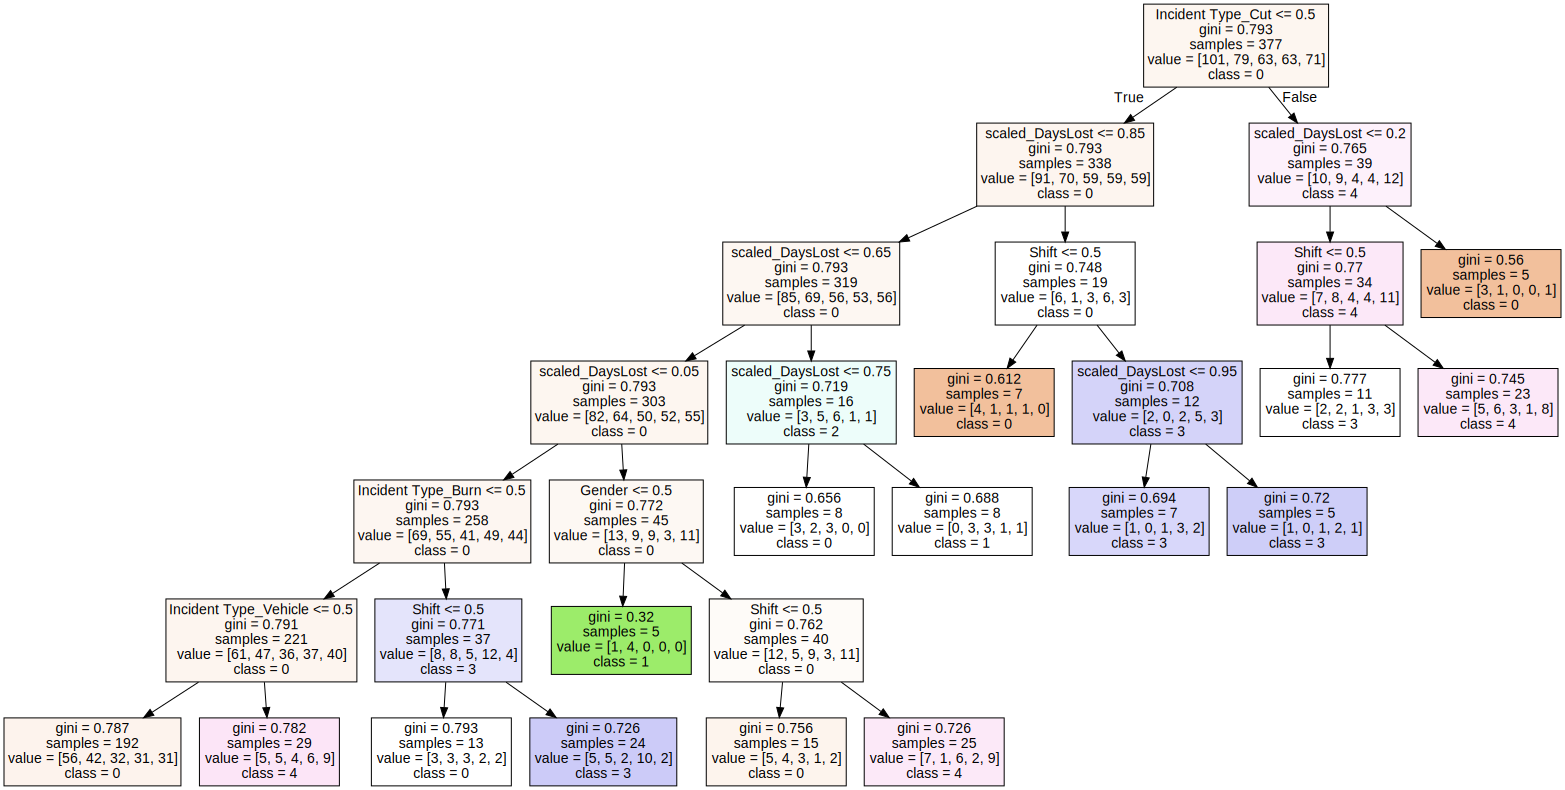

In [8]:
from sklearn.tree import export_graphviz

export_graphviz(dt, out_file="tree.dot", class_names=['0','1','2','3','4'],\
               feature_names=X_train.columns, impurity=True, filled=True)

import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
    
graphviz.Source(dot_graph)